In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import tree  # scikit-learn의 의사결정 트리를 사용하기 위해 import 한다.
from sklearn import preprocessing  # LabelEncoder() 메서드를 사용하기 위해 import 한다.
from sklearn.metrics import accuracy_score  # 모델 정확도를 예측하기 위해 import 한다.

# 의사결정 트리(Decision Tree)
- 데이터 분류 및 회귀에 사용되는 지도 학습 알고리즘으로 결과값이 어떻게 나왔는지 이해하기 쉽다는 것이 가장 큰 장점이다. 또한 높은 정확도 역시 상당히 큰 장점이다. 하지만 과대적합되기 쉬운 알고리즘이라는 단점도 있다.
- 의사결정 트리 알고리즘은 스무고개와 상당히 비슷하다. 데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 데이터를 분류할 수 있는데 스무고개에서는 적은 질문으로 정답을 맞추기 위해서 의미있는 질문을 먼저 하는 것이 중요하듯 의사결정 트리에서도 마찬가지이다.
데이터의 특징 속에서 분류에 큰 영향을 끼치는 특징을 발견하고 상위 노드를 선택하는 것이 의사결정 트리 알고리즘의 핵심이다.
- 스무고개를 할 때 질문자는 질문을 할 때마다 약간의 정보를 획득한다. 정보를 획득하는 과정은 정답에 대한 불확실성이 조금씩 줄어드는 것과 같은 개념이다.
- 정보 이론(Information Theory)에서는 이 불확실성을 수치적으로 표현한 값을 엔트로피(Entropy)라고 표현하며 정보 이득(Information Gain)은 질문 이전의 엔트로피에서 질문 후의 엔트로피를 뺀 값이 된다. 즉, 불확실성이 줄어든 정도를 정보 이득이라고 한다.
***
# 지니 계수(Gini Index/Impurity)
P ** 2 + Q ** 2
- 불순도를 측정하는 지표로 데이터의 통계적 분산정도를 정량화해서 표현한 것
- scikit-learn의 의사결정 트리는 CART(Classification And Regression Tree) 타입의 의사결정 트리이며 CART는 트리의 노드마다 특징을 2진 분류하는 특징이 있기에 scikit-learn은 의사결정 트리를 구성할 때 지니 계수를 사용한다.

# 문제 정의
서울 지역(구)의 위도와 경도 정보를 학습해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류하는 모델을 구현한다.
즉, 특정 지역이 강동인지 강서인지 아니면 강남인지 강북인지 알아내는 모델을 구현한다.

1. 데이터 획득
- district: 구
- dong: 동
- latitude: 위도
- longitude: 경도
- label: 강동, 강서, 강남, 강북으로 구분한 지역

In [3]:
# 구 데이터: 학습 데이터
district_dict_list = [
    {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label': 'Gangseo'},
    {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label': 'Gangseo'},
    {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label': 'Gangseo'},
    {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label': 'Gangseo'},
    {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label': 'Gangseo'},

    {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label': 'Gangnam'},
    {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label': 'Gangnam'},
    {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label': 'Gangnam'},
    {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label': 'Gangnam'},
    {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label': 'Gangnam'},

    {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label': 'Gangbuk'},
    {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label': 'Gangbuk'},
    {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label': 'Gangbuk'},
    {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label': 'Gangbuk'},
    {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label': 'Gangbuk'},

    {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label': 'Gangdong'},
    {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label': 'Gangdong'},
    {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label': 'Gangdong'},
    {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label': 'Gangdong'},
    {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label': 'Gangdong'}
]

# 동 데이터: 테스트 데이터
dong_dict_list = [
    {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label': 'Gangseo'},
    {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label': 'Gangseo'},
    {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label': 'Gangseo'},
    {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label': 'Gangseo'},
    {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label': 'Gangseo'},

    {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label': 'Gangnam'},
    {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label': 'Gangnam'},
    {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label': 'Gangnam'},
    {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label': 'Gangnam'},
    {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label': 'Gangnam'},

    {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label': 'Gangbuk'},
    {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label': 'Gangbuk'},
    {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label': 'Gangbuk'},
    {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label': 'Gangbuk'},
    {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label': 'Gangbuk'},

    {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label': 'Gangdong'},
    {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label': 'Gangdong'},
    {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label': 'Gangdong'},
    {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label': 'Gangdong'},
    {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label': 'Gangdong'}
]

In [4]:
train_df = pd.DataFrame(district_dict_list)
train_df.head()

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo


In [5]:
test_df = pd.DataFrame(dong_dict_list)
test_df.head()

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo


2. 데이터 분포
학습 데이터와 테스트 데이터의 분포를 확인한다.

In [6]:
# 학습 데이터의 레이블은 강동, 강서, 강남, 강북의 총 4종의 값으로 5개씩 일정한 양으로 분포되어있음을 확인할 수 있다.
print('train_df.label')
train_df['label'].value_counts()

train_df.label


Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [7]:
# 테스트 데이터의 레이블은 강동, 강서, 강남, 강북의 총 4종의 값으로 5개씩 일정한 양으로 분포되어있음을 확인할 수 있다.
print('test_df.label')
test_df.get('label').value_counts()

test_df.label


Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

3. 학습 데이터 시각화

Text(0.5, 1.0, 'District Visualization in 2D Plane')

<Figure size 1200x800 with 0 Axes>

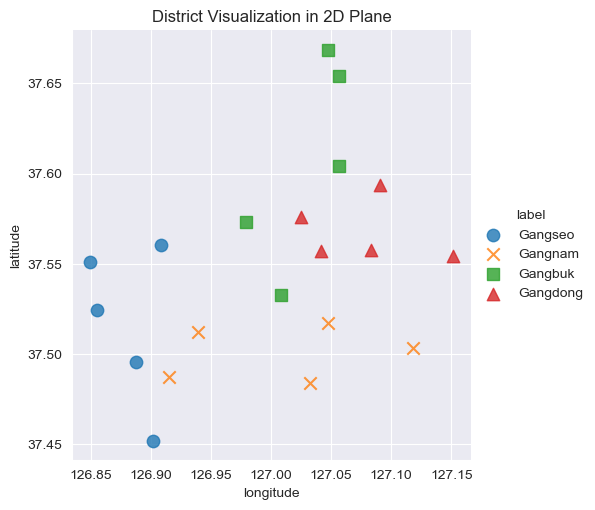

In [8]:
plt.figure(figsize=[12, 8])
sns.lmplot(data=train_df, x='longitude', y='latitude', fit_reg=False, hue='label', markers=['o', 'x', 's', '^'],
           scatter_kws={'s': 80})
plt.title('District Visualization in 2D Plane')

4. 데이터 전처리
위의 시각화를 통해 구 이름과 동 이름이 학습이나 테스트에 별 영향을 미치지 않는다는 점을 알았으므로 학습 및 테스트에 필요없는 특징(피쳐)을 데이터에서 제거한다.

In [9]:
# train_df = train_df.drop('district', axis=1)
train_df.drop('district', axis=1, inplace=True)  # 학습 데이터에서 구 제거
train_df.head()

,latitude,longitude,label
0,37.551000,126.849500,Gangseo
1,37.524240,126.855396,Gangseo
2,37.495400,126.887400,Gangseo
3,37.451900,126.902000,Gangseo
4,37.560229,126.908728,Gangseo


In [10]:
# test_df = test_df.drop('dong', axis=1)
test_df.drop('dong', axis=1, inplace=True)  # 테스트 데이터에서 구 제거
test_df.head()

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo


5. 모델 학습
scikit-learn의 의사결정 트리를 로드해서 학습시킨다.

In [11]:
X_train = train_df[['longitude', 'latitude']]
Y_train = train_df[['label']]
X_test = test_df[['longitude', 'latitude']]
Y_test = test_df[['label']]

In [12]:
# sklearn.preprocessing에 포함된 LabelEncoder() 메서드는 데이터를 모델화하고 학습을 시키기 위해 숫자로 만든다.
# Gangbuk: 0, Gangdong: 1, Gangnam: 2, Gangseo: 3
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y_train)
# y_encoded = preprocessing.LabelEncoder().fit_transform(Y_train)
print(y_encoded)
# classes_: LabelEncoder() 메서드로 숫자로 변환했던 원래의 label 데이터
print(le.classes_)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
['Gangbuk' 'Gangdong' 'Gangnam' 'Gangseo']


In [13]:

# DecisionTreeClassifier() 메서드로 의사결정 트리를 학습시킨다.
# DecisionTree의 내부 알고리즘 구동시 random하게 특성들과 데이터 건수를 선택하는 로직이 포함되어 있기 때문에 random_state로 특정 값을 지정하여 DecisionTree 수행시마다 동일한 rule의 트리를 만들 수 있도록 한다.
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

6. 학습된 의사결정 트리를 시각화하는 함수

In [14]:
def display_decision_surface(classifier, x, y):
    x_min = x.longitude.min() - 0.01
    x_max = x.longitude.max() + 0.01
    y_min = x.latitude.min() - 0.01
    y_max = x.latitude.max() + 0.01

    n_classes = len(le.classes_)
    # print(n_classes)
    plot_color = 'rywb'
    plot_step = 0.01

    # meshgrid(): 좌표 벡터로부터 좌표 행렬을 반환한다.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    # predict(): 학습 결과에 따른 예측을 한다.
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # print(Z)
    z = z.reshape(xx.shape)
    # print(f'type: {type(Z)}')
    # print(f'shape: {Z.shape}, dimension: {Z.ndim}, dtype: {Z.dtype}')
    # print('Array Data:\n', Z)

    # 등고선 차트
    plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)

    for i, color in zip(range(n_classes), plot_color):
        # print(i, color)
        # np.where(): 조건에 맞는 값의 색인 위치를 찾는다.
        idx = np.where(y == i)
        # print(idx)
        plt.scatter(x=x.loc[idx].longitude, y=x.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu,
                    edgecolor='black', s=100)

    plt.title('Decision Surface of a Decision Tree', fontsize=20)  # 차트 제목
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=14)  # 차트 범례
    plt.xlabel('longitude', fontsize=14)
    plt.ylabel('latitude', fontsize=14)

    plt.rcParams['figure.figsize'] = [7, 5]
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10

7. 과적합
의사결정 트리는 과대적합에 취약한 모델이다.
scikit-learn의 의사결정 트리는 과대적합을 피할 수 있도록 별도의 파라미터를 제공하는데 파라미터 미설정시 모델은 학습되지만 과대적합될 가능성이 높다.
여기서는 아무런 파라미터 설정없이 학습 데이터를 학습한 의사결정 트리의 결정 표면을 시각화했다. 아래의 차트는 강북 사이에 강동에 해당되는 데이터가 보이고 강동 사이에 강북에 해당되는 데이터가 보이는 것으로 미루어 보아 학습 데이터에만 너무 치우치게 학습됐다. 즉, 과대적합 되었다고 판단할 수 있다.

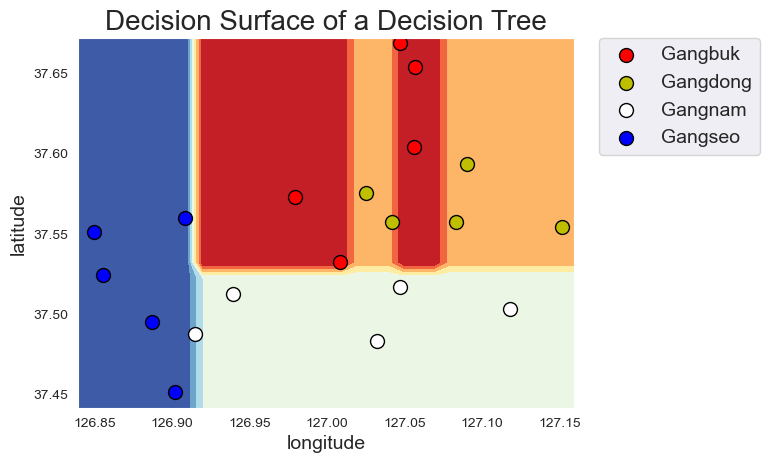

In [15]:
display_decision_surface(clf, X_train, y_encoded)

8. 과적합 방지
과대적합을 피하기 위한 파라미터를 설정해서 학습한다.

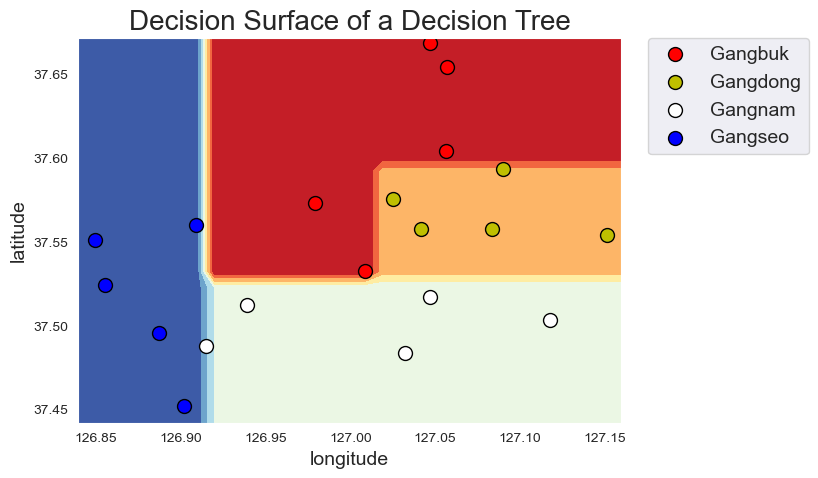

In [16]:
# max_depth: 트리의 최대 깊이 설정(★중요)
# min_samples_split: 자식 노드를 가지기 위한 최소한의 데이터 개수
# min_samples_leaf: 리프(터미널, 단노드) 노드의 최소 데이터 개수
clf = tree.DecisionTreeClassifier(random_state=70, max_depth=4, min_samples_split=2, min_samples_leaf=2).fit(X_train,
                                                                                                             y_encoded)
display_decision_surface(clf, X_train, y_encoded)

9. 의사결정 트리 시각화
graphviz를 사용하려면 아래와 같은 과정을 먼저 실행해야 한다.
https://graphviz.org/download/ 에서 graphviz설치파일(exe파일)을 다운받아 설치한다.
path 환경변수에 C:\Program Files\Graphviz\bin을 추가한다.
conda install graphviz와 같이 설치가 안되는 모듈은 pip install graphviz로 설치한다.

In [17]:
import graphviz

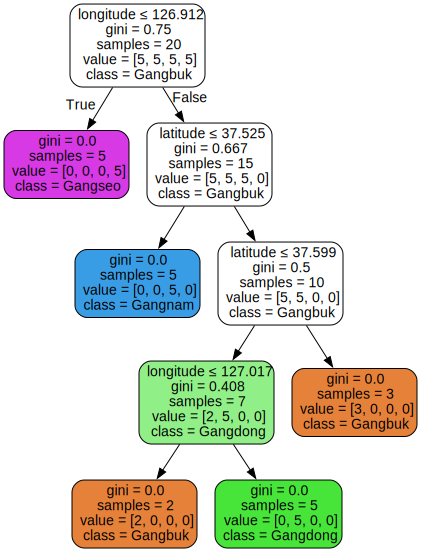

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['longitude', 'latitude'],
                                class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'], filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()
graph

In [19]:
predict = clf.predict(X_test)  # 모델 정확도를 예측한다.
print(predict)
print('정확도:', accuracy_score(Y_test.values.ravel(), le.classes_[predict]))  # 정확도를 출력한다.

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
정확도: 1.0


In [20]:
comparison = pd.DataFrame({'예측값': le.classes_[predict], '실제값': Y_test.values.ravel()})
comparison

,예측값,실제값
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


10. 임의 데이터 테스트

In [21]:
# 정확도 예측 후 임의의 내용으로 테스트 데이터를 만든다.
dong_dict_list = [
    {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label': 'Gangseo'},
    {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label': 'Gangnam'},
    {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label': 'Gangseo'},
    {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label': 'Gangdong'},
    {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label': 'Gangseo'}
]

test_df = pd.DataFrame(dong_dict_list)
X_test = test_df[['longitude', 'latitude']]
Y_test = test_df[['label']]

In [22]:
# 임의의 데이터에 대해 예측한다.
predict = clf.predict(X_test)
print(predict)
print('정확도:', accuracy_score(Y_test.values.ravel(), le.classes_[predict]))  # 정확도를 출력한다.

[3 3 3 3 3]
정확도: 0.6


In [23]:
comparison = pd.DataFrame({'예측값': le.classes_[predict], '실제값': Y_test.values.ravel()})
comparison

,예측값,실제값
0,Gangseo,Gangseo
1,Gangseo,Gangnam
2,Gangseo,Gangseo
3,Gangseo,Gangdong
4,Gangseo,Gangseo
